<a href="https://colab.research.google.com/github/rahiakela/deep-learning-for-computer-vision/blob/main/1-image-data-preparation/5_image_data_augmentation_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Data Augmentation with Keras

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images. The Keras deep learning neural network library provides the capability to fit models using image data augmentation
via the **ImageDataGenerator** class.

##Setup

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from numpy import expand_dims

from matplotlib import pyplot

In [2]:
!wget -q https://machinelearningmastery.com/wp-content/uploads/2019/01/bird.jpg

## Image Augmentation With ImageDataGenerator

The Keras deep learning library provides the ability to use data augmentation automatically when training a model. This is achieved by using the ImageDataGenerator class. 

First, the class must be instantiated and the configuration for the types of data augmentation are specified by arguments to the class constructor. A range of techniques are supported, as well as pixel scaling methods. We will focus on five main types of data augmentation techniques for image data; specifically:

- Image shifts via the width shift range and height shift range arguments.
- Image flips via the horizontal flip and vertical flip arguments.
- Image rotations via the rotation range argument
- Image brightness via the brightness range argument.
- Image zoom via the zoom range argument.

For example, an instance of the ImageDataGenerator class can be constructed.

```python
# create data generator
datagen = ImageDataGenerator()
```

Once constructed, an iterator can be created for an image dataset. The iterator will return one batch of augmented images for each iteration. An iterator can be created from an image dataset loaded in memory via the
flow() function;

```python
# load image dataset
X, y = ...
# create iterator
it = datagen.flow(X, y)
```

Alternately, an iterator can be created for an image dataset located on disk in a specified directory, where images in that directory are organized into subdirectories according to their class.

```python
# create iterator
it = datagen.flow_from_directory(X, y, ...)
```

Once the iterator is created, it can be used to train a neural network model by calling the fit generator() function. The steps per epoch argument must specify the number of batches of samples comprising one epoch. 

For example, if your original dataset has 10,000 images and your batch size is 32, then a reasonable value for steps per epoch when fitting a
model on the augmented data might be ceil(10,000/32), or 313 batches.

```python
# define model
model = ...
# fit model on the augmented dataset
model.fit_generator(it, steps_per_epoch=313, ...)
```


## Horizontal and Vertical Shift Augmentation

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same. This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified. The width shift range and height shift range arguments to the ImageDataGenerator constructor control the amount of horizontal and vertical shift respectively. These arguments can specify a floating point value that indicates the percentage
(between 0 and 1) of the width or height of the image to shift. Alternately, a number of pixels can be specified to shift the image.

Specifically, a value in the range between no shift and the percentage or number of pixels
will be sampled for each image and the shift performed, e.g. [0, value]. Alternately, you
can specify a tuple or array of the min and max range from which the shift will be shifted; for
example: [-100, 100] or [-0.5, 0.5]. The example below demonstrates a horizontal shift with
the width shift range argument between [-200,200] pixels and generates a plot of generated
images to demonstrate the effect.

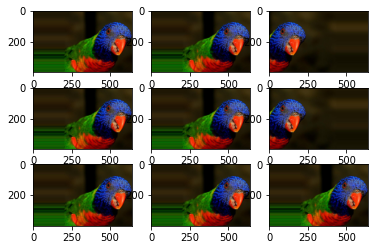

In [4]:
# load the image
img = load_img("bird.jpg")

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200, 200])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype("uint8")
  # plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()

Below is the same example updated to perform vertical shifts of the image via the height shift range
argument, in this case specifying the percentage of the image to shift as 0.5 the height of the
image.

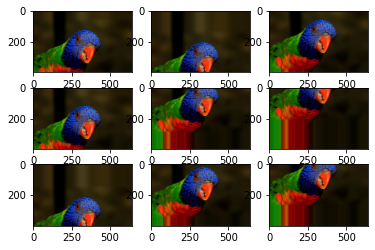

In [5]:
# load the image
img = load_img("bird.jpg")

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype("uint8")
  # plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()

##Horizontal and Vertical Flip Augmentation

An image flip means reversing the rows or columns of pixels in the case of a vertical or
horizontal flip respectively. The flip augmentation is specified by a boolean horizontal flip
or vertical flip argument to the ImageDataGenerator class constructor. 

For photographs
like the bird photograph used in this tutorial, horizontal flips may make sense, but vertical flips
would not. For other types of images, such as aerial photographs, cosmology photographs, and
microscopic photographs, perhaps vertical flips make sense.

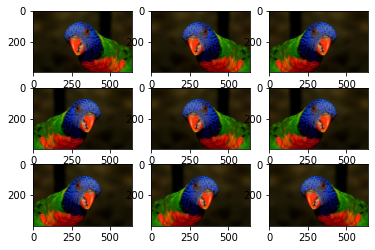

In [6]:
# load the image
img = load_img("bird.jpg")

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype("uint8")
  # plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()

We can see that the horizontal flip is applied randomly to some images and not others.

##Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees
from 0 to 360. The rotation will likely rotate pixels out of the image frame and leave areas of
the frame with no pixel data that must be filled in. 

The example below demonstrates random
rotations via the rotation range argument, with rotations to the image between 0 and 90
degrees.

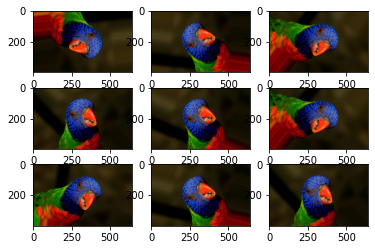

In [7]:
# load the image
img = load_img("bird.jpg")

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype("uint8")
  # plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()

##Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening
images, or both. The intent is to allow a model to generalize across images trained on different
lighting levels. 

This can be achieved by specifying the brightness range argument to the
ImageDataGenerator() constructor that specifies min and max range as a float representing a
percentage for selecting a darkening or brightening amount. 

Values less than 1.0 darken the
image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0
has no effect on brightness. The example below demonstrates a brightness image augmentation,
allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%.

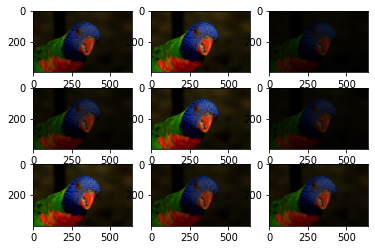

In [8]:
# load the image
img = load_img("bird.jpg")

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype("uint8")
  # plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()

##Random Zoom Augmentation

A zoom augmentation randomly zooms the image and either adds new pixel values around
the image or interpolates pixel values respectively. Image zooming can be configured by the
zoom range argument to the ImageDataGenerator constructor. 

You can specify the percentage
of the zoom as a single float or a range as an array or tuple. If a float is specified, then the range
for the zoom will be [1-value, 1+value]. 

For example, if you specify 0.3, then the range will be
[0.7, 1.3], or between 70% (zoom in) and 130% (zoom out). The zoom amount is uniformly
randomly sampled from the zoom region for each dimension (width, height) separately.

The zoom may not feel intuitive. Note that zoom values less than 1.0 will zoom the image
in, e.g. [0.5,0.5] makes the object in the image 50% larger or closer, and values larger than 1.0
will zoom the image out by 50%, e.g. [1.5, 1.5] makes the object in the image smaller or further
away. A zoom of [1.0,1.0] has no effect.

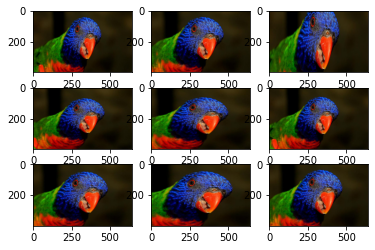

In [9]:
# load the image
img = load_img("bird.jpg")

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype("uint8")
  # plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()